In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/Tesis/tesis/generative')
else:
    os.chdir('../generative')

In [3]:
import argparse
import json
import models
import training_loss

import torch
from dataset_manager import GenerativeAIDataset
from torch.utils.data import DataLoader

from transformation.data_preprocessing import get_data_composing

from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
### Parametros del script
from collections import namedtuple

Args = namedtuple('Args', [
    'batch_size',
    'learning_rate',
    'max_epochs',
    'model',
    'config'
])

args = Args(
    batch_size=8,
    learning_rate=1e-3,
    max_epochs=50,
    model='DIFFUSION',
    config='./config.json')

In [5]:
with open(args.config, 'r') as f:
    config = json.load(f)

device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = args.batch_size
model_name = args.model
lr = args.learning_rate

sr = config['audio_config']['sample_rate']

In [6]:
from sampling.sampling_utils import get_diffusion_sample
import sys
sys.path.append(os.path.abspath("../model_utils"))
from model_utils.diffusion_utils import calc_diffusion_hyperparams

diffusion_config = config['diffusion_config']

In [7]:
diffusion_config

{'T': 200, 'beta_0': 0.0001, 'beta_T': 0.02}

In [20]:
diffusion_config['beta_T'] = 1
diffusion_config['T'] = 100
diffusion_config['pot'] = 5
diffusion_config['scale'] = True

In [21]:
diffusion_config

{'T': 100, 'beta_0': 0.0001, 'beta_T': 1, 'pot': 5, 'scale': True}

In [22]:
diffusion_hyperparams = calc_diffusion_hyperparams(**diffusion_config)

In [23]:
diffusion_hyperparams.keys()

dict_keys(['T', 'Beta', 'Alpha', 'Alpha_bar', 'Sigma'])

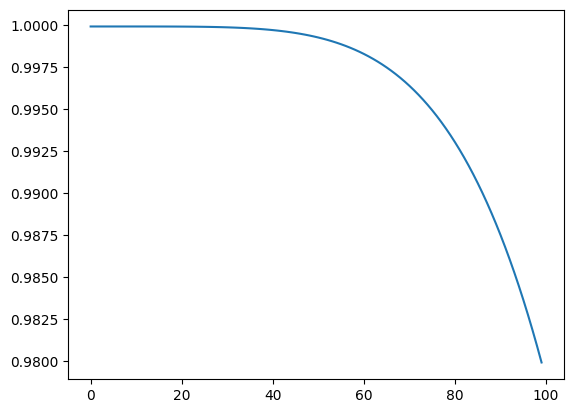

In [26]:
plt.plot(diffusion_hyperparams['Alpha'])

In [23]:
330/11

30.0

In [34]:
from sampling.sampling_utils import get_diffusion_sample
import sys
sys.path.append(os.path.abspath("../model_utils"))
from model_utils.diffusion_utils import calc_diffusion_hyperparams

diffusion_config = config['diffusion_config']
diffusion_hyperparams = calc_diffusion_hyperparams(**diffusion_config)
samples = get_diffusion_sample(model, (10, 1, sr), diffusion_hyperparams)

begin sampling, total number of reverse steps = 200


Reverse process: 100%|██████████| 200/200 [00:35<00:00,  5.56it/s]


In [35]:
samples.shape

torch.Size([10, 1, 16000])

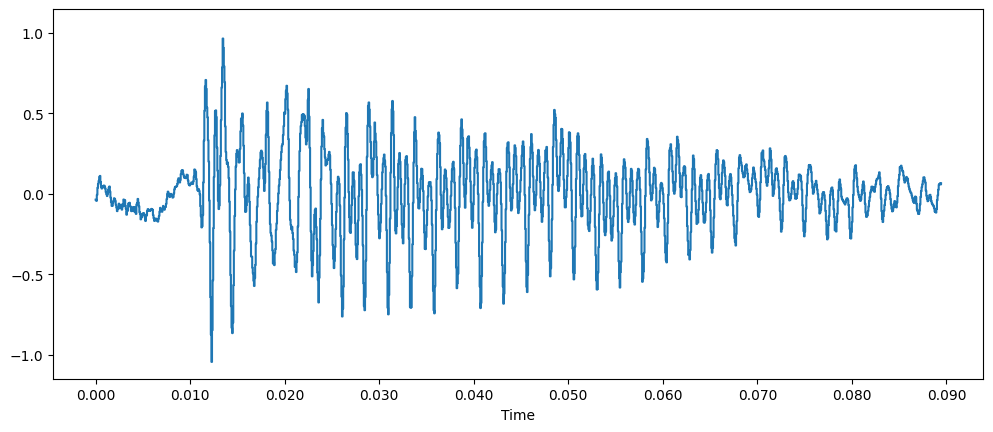

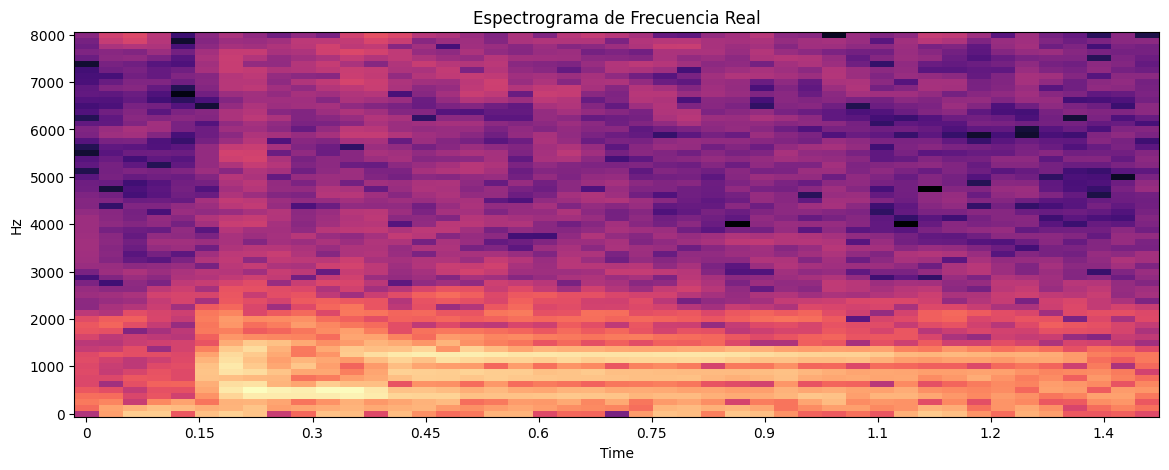

In [36]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from IPython.display import Audio

h = samples.cpu().numpy()[0][0][:1432]
plt.figure().set_figwidth(12)
librosa.display.waveshow(h, sr=sr)
# Perform a Short-Time Fourier Transform (STFT)
D = librosa.stft(h,n_fft= 1024//2//2//2)
# Convert the complex-valued result to magnitude
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frecuencia Real')
plt.show()
Audio(data=h, rate=sr)

In [ ]:
1.0348935 + m.bias[0]


tensor(0.8643, grad_fn=<AddBackward0>)